# SVM - Support Vector Machine

### 🧠 Support Vector Machine (SVM) - From Scratch

Support Vector Machines are powerful supervised learning algorithms used for classification and regression.

---

## 📌 What is an SVM?

SVM is a supervised learning model that finds the **optimal hyperplane** that best separates the data into classes. The optimal hyperplane is the one with the **maximum margin** between the classes.

---

## ❓ Why Use SVM?

- **Effective in high-dimensional spaces**
- **Robust to overfitting**, especially in high-dimensional space
- Can be **kernelized** to work in non-linear settings

---

## 🧮 Mathematics Behind SVM

### 1. Linear SVM for Binary Classification

Given a labeled dataset:

$$
\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}, \quad y_i \in \{-1, 1\}
$$

We want to find a hyperplane:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

To classify data correctly:

$$
 y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

We want to maximize the margin:

$$
\text{margin} = \frac{2}{\lVert \mathbf{w} \rVert}
$$

Which is equivalent to minimizing:

$$
\frac{1}{2} \lVert \mathbf{w} \rVert^2
$$

### 🎯 Optimization Objective

$$
\begin{align}
\text{Minimize} \quad & \frac{1}{2} \lVert \mathbf{w} \rVert^2 \\
\text{subject to} \quad & y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 \quad \forall i
\end{align}
$$

---

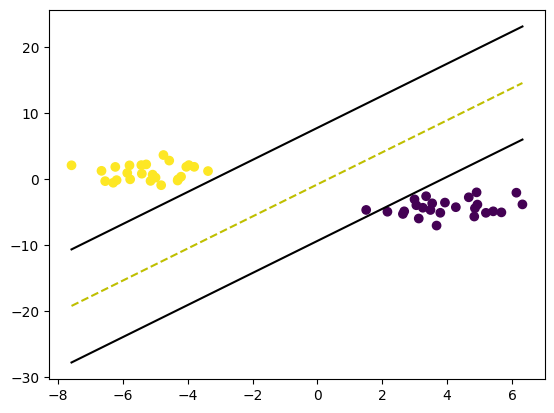

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

# Example usage
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=123)
y = np.where(y == 0, -1, 1)

svm = SVM()
svm.fit(X, y)

predictions = svm.predict(X)

# Plot decision boundary
def plot_svm(X, y, model):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')  # Decision boundary
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')  # Support vector - margin
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')  # Support vector - margin

    plt.show()

plot_svm(X, y, svm)

## 🌐 Kernel SVM (RBF Kernel)

Kernel functions allow SVM to classify data that is not linearly separable.

### Common Kernels
- **Polynomial**: $$ K(x, x') = (x^T x' + c)^d $$
- **RBF (Gaussian)**: $$ K(x, x') = \exp(-\gamma \lVert x - x' \rVert^2) $$

### Kernel Trick
Instead of transforming data explicitly to a high-dimensional space, we compute inner products via kernels.


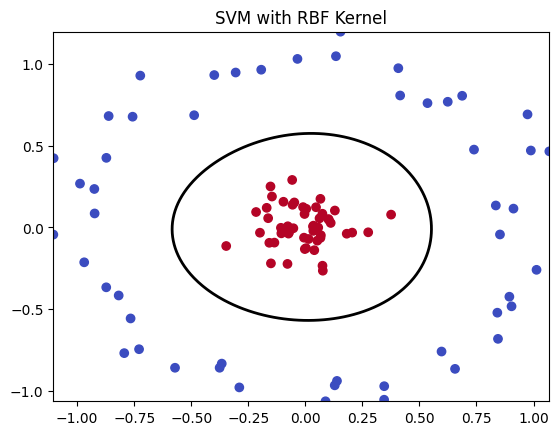

In [4]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Create a grid to plot decision boundaries
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100),
                     np.linspace(X[:,1].min(), X[:,1].max(), 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.title("SVM with RBF Kernel")
plt.show()